In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'


In [5]:
utility_ds = pd.read_csv(url, error_bad_lines=False)

In [6]:
utility_ds.head(10)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.77,2.77,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.24,43.25,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.77,0.00,0.450
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133.0,24.840000,58.54,55.13,2.360
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520.0,24.290000,33.97,34.65,1.400
9,f1_fuel_1994_12_4_0_1,4,1994,units 1-3,coal,ton,1471233.0,22.484000,28.73,28.11,1.278


In [ ]:
utility_ds.columns.values

In [ ]:
utility_ds.index.values

In [108]:
utility_ds.shape

(29523, 10)

In [ ]:
utility_ds.info()

In [ ]:
utility_ds.isnull().sum()

In [ ]:
utility_ds.isnull().head()

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(utility_ds.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [ ]:
utility_ds.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [ ]:
utility_ds.groupby('fuel_type_code_pudl').fuel_unit.transform(lambda x: x.fillna(x.mode()[0]))

0        ton
1        ton
2        ton
3        ton
4        mcf
        ... 
29518    mcf
29519    mcf
29520    mcf
29521    ton
29522    mcf
Name: fuel_unit, Length: 29523, dtype: object

In [ ]:
utility_ds.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [ ]:
utility_ds.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2018_12_150_1_7,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [46]:
#use groupby to count the sum of each unique value in the fuel unit column
utility_ds.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [ ]:
utility_ds[['fuel_unit']] = utility_ds[['fuel_unit']].fillna(value='mcf')

In [ ]:
utility_ds.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [ ]:
utility_ds.groupby('report_year')['report_year'].count()

In [111]:
utility_ds.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

In [110]:
#group by the fuel type code year and print the first entries in all the groups formed
utility_ds.groupby('fuel_type_code_pudl').first()

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,
coal,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [ ]:
fuel_df1 = utility_ds.iloc[0:19000].reset_index(drop=True)
fuel_df1

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
...,...,...,...,...,...,...,...,...,...,...,...
18995,f1_fuel_2009_12_182_1_9,182,2009,lake road,gas,mcf,340857.0,1.000000,4.711,4.711,4.711
18996,f1_fuel_2009_12_182_1_10,182,2009,lake road,oil,mcf,771.0,5.801544,84.899,84.899,14.634
18997,f1_fuel_2009_12_182_1_13,182,2009,iatan (18%),coal,ton,414142.0,16.718000,18.509,17.570,1.107
18998,f1_fuel_2009_12_182_1_14,182,2009,iatan (18%),oil,bbl,5761.0,5.537910,83.636,72.280,15.102


In [ ]:
fuel_df2 = utility_ds.iloc[19000:].reset_index(drop=True)
fuel_df2

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_2009_12_79_0_2,79,2009,montrose,oil,bbl,22912.0,5.770422,65.443,67.540,11.341
1,f1_fuel_2009_12_79_0_4,79,2009,hawthorn 5,coal,ton,2408123.0,16.782000,18.598,18.310,1.108
2,f1_fuel_2009_12_79_0_5,79,2009,hawthorn 5,gas,mcf,82141.0,1.000000,6.238,6.238,6.238
3,f1_fuel_2009_12_79_0_7,79,2009,hawthorn 6 & 9,gas,mcf,1701680.0,1.000000,4.885,4.885,4.885
4,f1_fuel_2009_12_79_0_10,79,2009,hawthorn 7 & 8,gas,mcf,82601.0,1.000000,5.383,5.383,5.383
...,...,...,...,...,...,...,...,...,...,...,...
10518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059000,4.780,4.780,9.030
10519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050000,3.650,3.650,6.950
10520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060000,4.770,4.770,8.990
10521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108000,3.060,14.760,1.110


In [ ]:
#check that the length of both dataframes sum to the expected length
assert len(utility_ds) == (len(fuel_df1) + len(fuel_df2))

In [ ]:
#an inner merge will lose rows that do not match in both dataframes
pd.merge(fuel_df1, fuel_df2, how="inner")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


In [ ]:
#outer merge returns all rows in both dataframes
pd.merge(fuel_df1, fuel_df2, how="outer")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [ ]:
#removes rows from the right dataframe that do not have a match with the left
#and keeps all rows from the left
pd.merge(fuel_df1, fuel_df2, how="left")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
...,...,...,...,...,...,...,...,...,...,...,...
18995,f1_fuel_2009_12_182_1_9,182,2009,lake road,gas,mcf,340857.0,1.000000,4.711,4.711,4.711
18996,f1_fuel_2009_12_182_1_10,182,2009,lake road,oil,mcf,771.0,5.801544,84.899,84.899,14.634
18997,f1_fuel_2009_12_182_1_13,182,2009,iatan (18%),coal,ton,414142.0,16.718000,18.509,17.570,1.107
18998,f1_fuel_2009_12_182_1_14,182,2009,iatan (18%),oil,bbl,5761.0,5.537910,83.636,72.280,15.102


In [ ]:
#check for duplicate rows
utility_ds.duplicated().any()

False

**Data Visulization**

Text(0.5, 0, 'Fuel Unit')

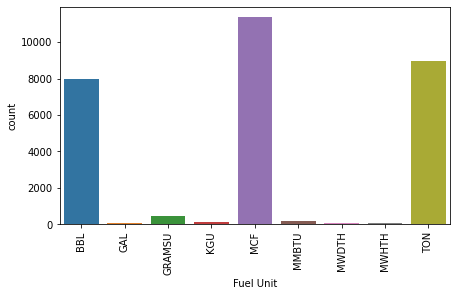

In [7]:
#Barchart plot
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'],
            'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')

Text(0.5, 0, 'Fuel Unit')

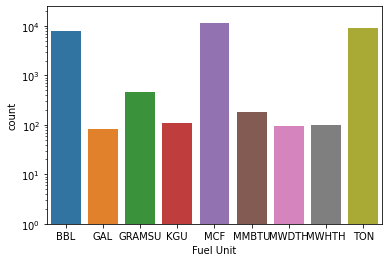

In [10]:
#Because of the extreme range of the values for the fuel unit, we can plot the barchart by taking the logarithm of the y-axis as follows:
g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 25000)
plt.xlabel('Fuel Unit')

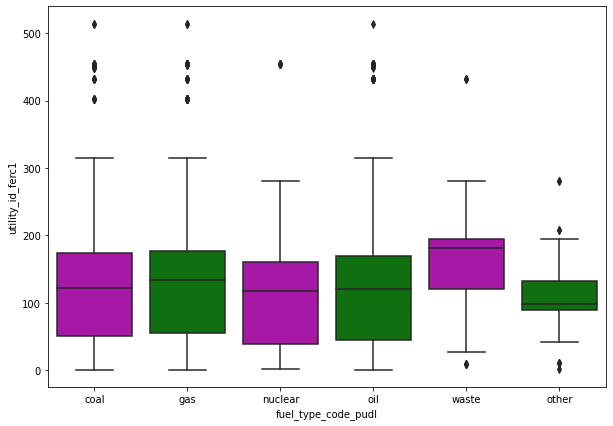

In [24]:
# Boxplot
plt.figure(figsize=(10,7))
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1", palette=["m", "g"], data=utility_ds)

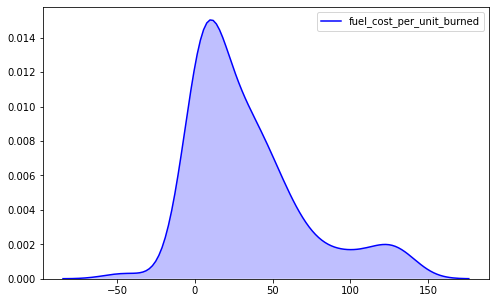

In [26]:
# KDE plot 
sample_df = utility_ds.sample(n=100, random_state=4)
plt.figure(figsize=(8,5))
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color="b")

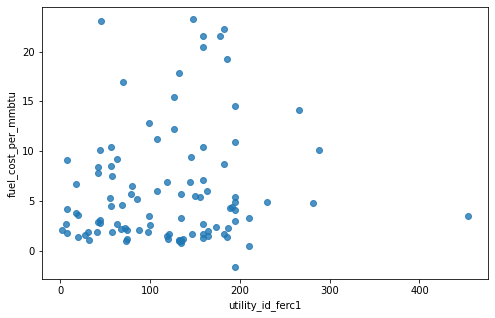

In [28]:
#Regression plot
plt.figure(figsize=(8,5))
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"], fit_reg=False)

In [44]:
fuel_type = utility_ds['fuel_type_code_pudl']
fuel_type.head()

0    coal
1    coal
2    coal
3    coal
4     gas
Name: fuel_type_code_pudl, dtype: object

In [51]:
fuel_type_count = utility_ds.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()
fuel_type_count

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

In [59]:
fuel_data = pd.DataFrame({'type':['coal','gas','nuclear','oil','other','waste'],
             'number':['8547','11486','818','8064','167','441'],
            }) 
fuel_data                     

,type,number
0,coal,8547
1,gas,11486
2,nuclear,818
3,oil,8064
4,other,167
5,waste,441


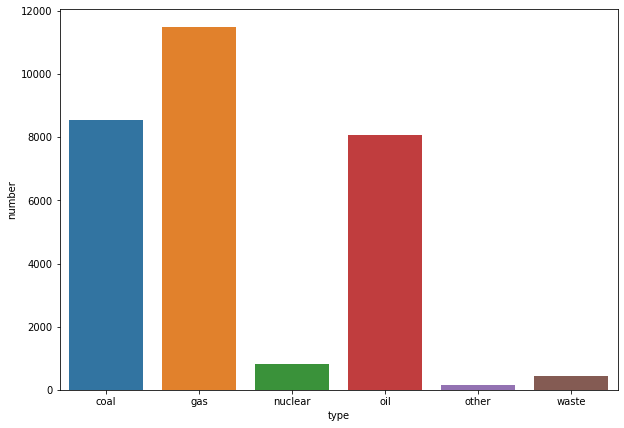

In [62]:
#barplot
plt.figure(figsize=(10,7))
sns.barplot(x='type', y='number', data=fuel_data)

In [75]:
utility_ds.drop(['record_id'], axis=1, inplace=True)

In [76]:
utility_ds.head()

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [81]:
fuel_df=utility_ds.groupby('plant_name_ferc1').first()
fuel_df.head()

,utility_id_ferc1,report_year,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
plant_name_ferc1,,,,,,,,,
(1)sta98,151,1994,gas,mcf,33044.0,1.031000,3.50,3.500,3.399
(2) scriba sta. 99,151,1994,nuclear,gramsU,107129.0,0.000120,59.79,1.274,0.499
(n) contra costa,133,1995,gas,mcf,11338219.0,1.030497,2.18,0.000,2.110
(n) pittsburg,133,1995,gas,mcf,34851184.0,1.028679,2.25,0.000,2.180
(n)(t)moss landing,133,1994,gas,mcf,87863451.0,1.021308,2.26,0.000,2.220


In [82]:
utility_ds.groupby('plant_name_ferc1').first().shape

(2315, 9)

In [94]:
op_costs= utility_ds.groupby('plant_name_ferc1')['fuel_cost_per_unit_burned','fuel_cost_per_unit_delivered','fuel_cost_per_mmbtu'].sum()
op_costs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
plant_name_ferc1,,,
(1)sta98,3.500,3.500,3.3990
(2) scriba sta. 99,59.790,1.274,0.4990
(n) contra costa,2.180,0.000,2.1100
(n) pittsburg,2.250,0.000,2.1800
(n)(t)moss landing,2.260,0.000,2.2200
...,...,...,...
zimmer- aepgr share,187.027,254.238,25.3670
zion,0.000,0.000,1.4440
zorn,52.909,52.981,51.6810


In [103]:
op_costs['Total'] = op_costs.sum(axis=1)

In [105]:
#Total operations cost for each power plant
op_costs.head(10)

,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,Total
plant_name_ferc1,,,,
(1)sta98,3.500,3.500,3.399,10.399
(2) scriba sta. 99,59.790,1.274,0.499,61.563
(n) contra costa,2.180,0.000,2.110,4.290
(n) pittsburg,2.250,0.000,2.180,4.430
(n)(t)moss landing,2.260,0.000,2.220,4.480
(p) mobile unit 2,34.510,0.000,5.940,40.450
(p) mobile unit 3,34.400,0.000,5.940,40.340
* ar nuclear one,1.679,0.000,0.492,2.171
* big cajun 2 unit 3,1.726,0.000,1.726,3.452
